### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [56]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [57]:
reviews = pd.read_csv('turtle_reviews.csv') # Load the CSV file(s) as reviews.
reviews.head() # View the DataFrame.

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [58]:
# 3.b Explore the data.
reviews.info()
print(reviews.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loya

In [59]:
# 3.c Any missing values? There is no missing values.
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [60]:
# 3.d Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [61]:
# Drop unnecessary columns "language and platform". df.drop(columns = [''])
reviews = reviews.drop(columns = ['language', 'platform'])

# View column names.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 3. Rename columns

In [62]:
# Rename the column headers. df.rename(columns={"A": "a", "B": "c"})
reviews = reviews.rename(columns = {'remuneration (k£)':'remuneration','spending_score (1-100)':'spending_score'})

# View column names.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [63]:
# Create a CSV file as output.
reviews.to_csv('clean_reviews.csv')

In [64]:
# Import new CSV file with Pandas.
clean_reviews = pd.read_csv('clean_reviews.csv')

# View DataFrame.
clean_reviews.head()
clean_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


## 5. Linear regression

### 5a) spending vs loyalty

In [65]:
x = clean_reviews['spending_score'] # Independent variable.
y = clean_reviews['loyalty_points'] # Dependent variable.

f = 'y ~ x' # R-style formula is one derived from the programming language R.
spending_loyalty = ols(f, data = clean_reviews).fit() # OLS model and summary.
print(spending_loyalty.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 13 Aug 2022   Prob (F-statistic):          2.92e-263
Time:                        10:24:50   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

In [66]:
# Extract the estimated parameters.
print("Estimated Parameters:", spending_loyalty.params)

# Extract the standard errors.
print("Standard Errors:", spending_loyalty.bse)

# Extract the predicted values.
print("Predicted Values:", spending_loyalty.predict())

Estimated Parameters: Intercept   -75.052663
x            33.061693
dtype: float64
Standard Errors: Intercept    45.930554
x             0.814419
dtype: float64
Predicted Values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [67]:
# Set the X coefficient and the constant to generate the regression table.
y_pre_spending_loyalty = 33.061693 * x -75.052663

# View the output.
y_pre_spending_loyalty

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

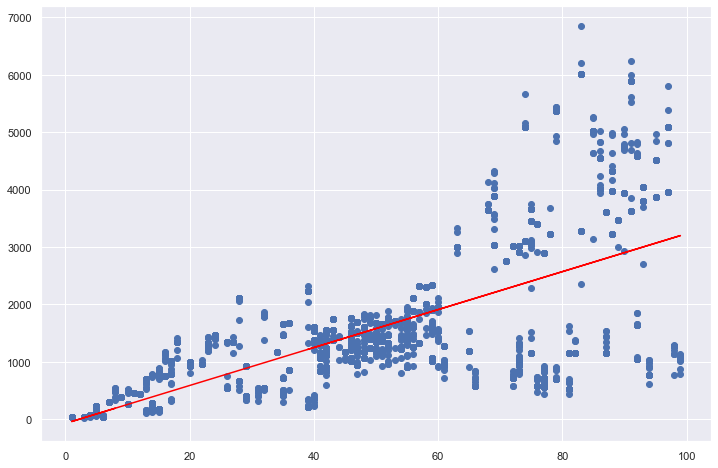

In [68]:
# Plot the graph with a regression line.
plt.scatter(x, y)
plt.plot(x, y_pre_spending_loyalty, color = 'red')

### 5b) renumeration vs loyalty

In [69]:
x = clean_reviews['remuneration'] # Independent variable.
y = clean_reviews['loyalty_points'] # Dependent variable.

f = 'y ~ x'
renumeration_loyalty = ols(f, data = clean_reviews).fit() # OLS model and summary.
print(renumeration_loyalty.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 13 Aug 2022   Prob (F-statistic):          2.43e-209
Time:                        10:24:51   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

In [70]:
# Extract the estimated parameters.
print('Estimated Parameters:', renumeration_loyalty.params)

# Extract the standard errors.
print('Standard Errors:', renumeration_loyalty.bse)

# Extract the predicted values.
print('Predicted Values:', renumeration_loyalty.predict())

Estimated Parameters: Intercept   -65.686513
x            34.187825
dtype: float64
Standard Errors: Intercept    52.170717
x             0.977925
dtype: float64
Predicted Values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [71]:
# Set the the X coefficient and the constant to generate the regression table.
y_pre_r_royalty = 34.187825 * x -65.686513

# View the output.
y_pre_r_royalty

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

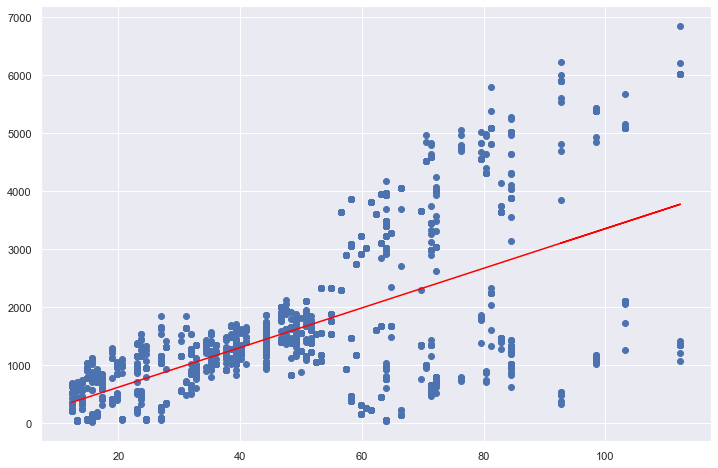

In [72]:
# Plot graph with regression line.
plt.scatter(x, y)
plt.plot(x, y_pre_r_royalty, color = 'red')

### 5c) age vs loyalty

In [73]:
x = clean_reviews['age'] # Independent variable.
y = clean_reviews['loyalty_points'] # Dependent variable.

f = 'y ~ x'
age_loyalty = ols(f, data = clean_reviews).fit() # OLS model and summary.
print(age_loyalty.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 13 Aug 2022   Prob (F-statistic):             0.0577
Time:                        10:24:51   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

In [74]:
# Extract the estimated parameters.
print('Estimated Parameters:', age_loyalty.params)

# Extract the standard errors.
print('Standard Errors:', age_loyalty.bse)

# Extract the predicted values.
print('Predicted Values:', age_loyalty.predict())

Estimated Parameters: Intercept    1736.517739
x              -4.012805
dtype: float64
Standard Errors: Intercept    88.248731
x             2.113177
dtype: float64
Predicted Values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [75]:
# Set the X coefficient and the constant to generate the regression table.
y_pre_age_loyalty = -4.012805 * x + 1736.517739

# View the output.
y_pre_age_loyalty

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

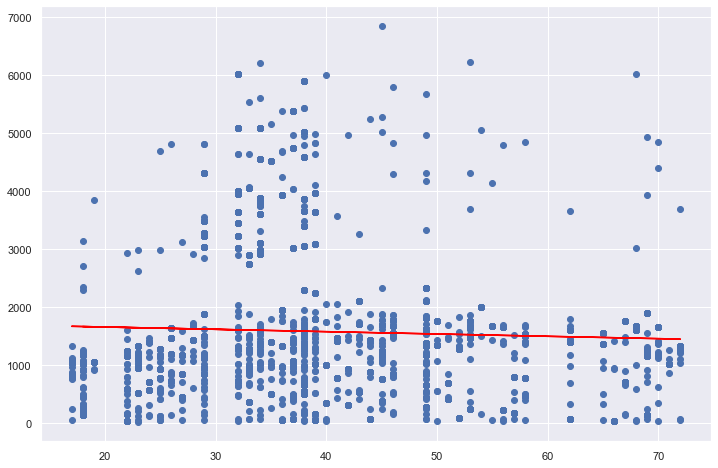

In [76]:
# Plot graph with regression line.
plt.scatter(x, y)
plt.plot(x, y_pre_age_loyalty, color = 'red')

## 6. Observations and insights

***Your observations here...***






To understand the relationships between loyalty points (dependable variable) and age, remuneration, and spending scores, three simple regression models were built. The result shows that spending scores and remuneration have a positive relationship with loyalty points, meaning the higher the spending score or the remuneration a customer has, the higher the loyal points the customer acquires. Compared to spending scores, remuneration seems to have a stronger impact on loyalty points, meaning that remuneration can influence loyalty points better than spending scores (remuneration coefficient r = 34.187825; spending score coefficient r = 33.061693). Interestingly, age has a negative relationship with loyalty points as the coefficient is showing as minus (-4.012805), indicating that the older a customer is, the less the loyalty points the customer acquires. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [77]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [78]:
# Load the CSV file(s) as df2.
df2 = clean_reviews[['remuneration', 'spending_score', 'education']]

# View DataFrame.
df2.head()

,remuneration,spending_score,education
0,12.30,39,graduate
1,12.30,81,graduate
2,13.12,6,graduate
3,13.12,77,graduate
4,13.94,40,graduate


In [79]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
 2   education       2000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [80]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

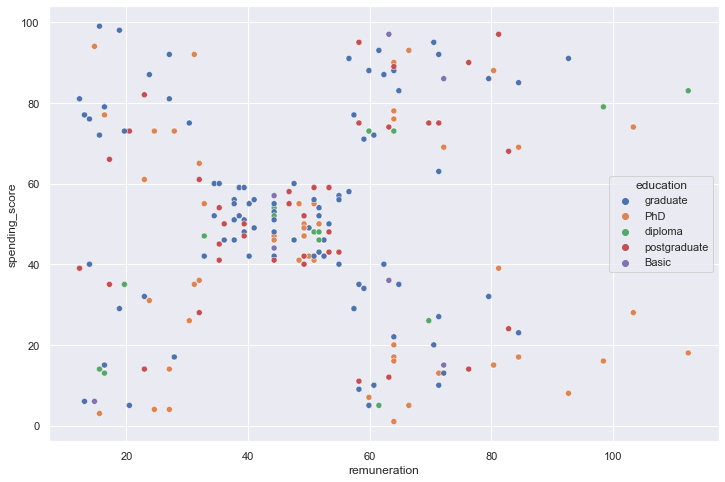

In [81]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score', hue = 'education', data=df2)

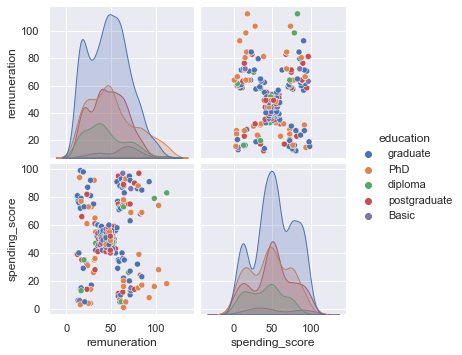

In [82]:
# Create a pairplot with Seaborn.
x = df2[['remuneration','spending_score']]

sns.pairplot(df2, vars=x, hue='education', diag_kind= 'kde')

## 3. Elbow and silhoutte methods

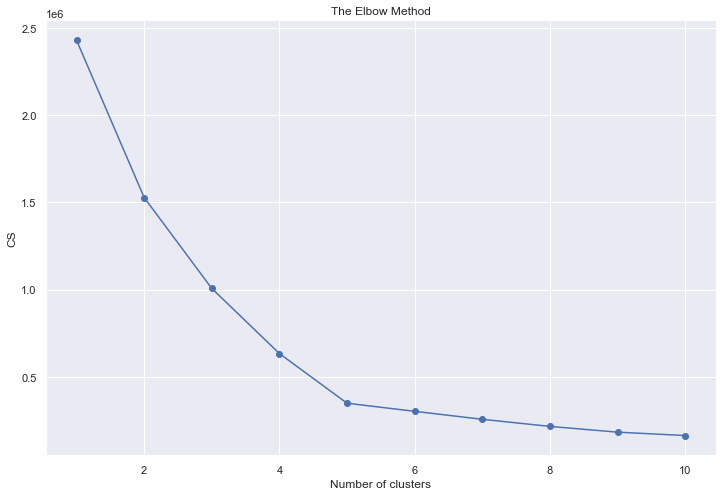

In [83]:
# Determine the number of clusters: Elbow method.
cs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
    
# Plot the Elbow method.
plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

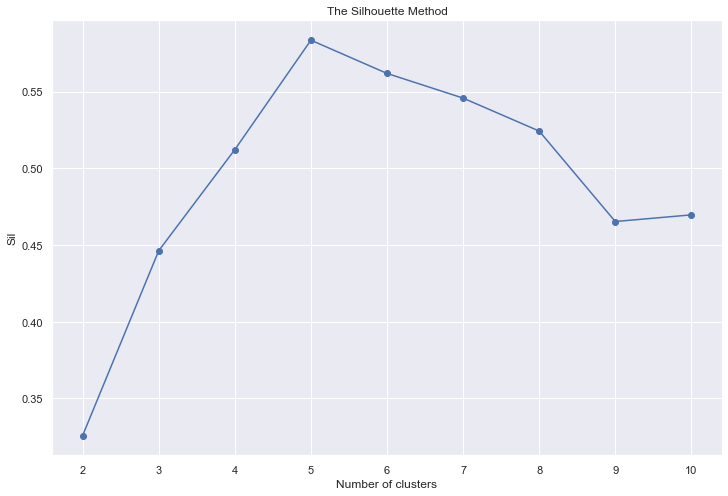

In [84]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

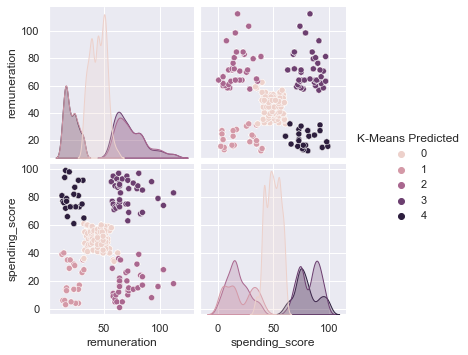

In [85]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter=15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters 

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

In [86]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


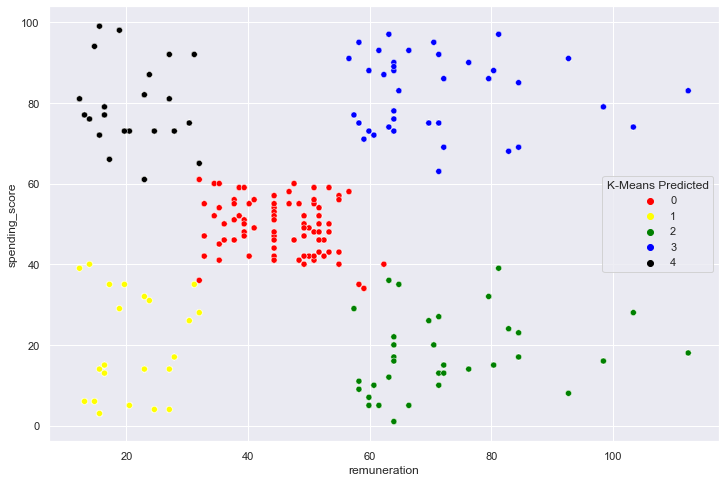

In [87]:
# Visualising the clusters.
sns.set(rc={'figure.figsize':(12,8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'yellow', 'green', 'blue', 'black'])

# View the DataFrame.
print(x.head())

## 7. Discuss: Insights and observations

***Your observations here...***

The clustering algorithm was applied to identify groups with the given data – game marketing. Firstly, the scatterplot and pair plot were used to understand the distribution of the dataset. The result shows that most data points are showing overlapped by each other. However, we can still identify 5 clusters in the plot. Interestingly, education was input as hues, but the result shows that it seems not the ideal attribute to cluster the dataset. Afterwards, the elbow and Silhouette methods were investigated to improve the accuracy and define the k cluster number. The outcome demonstrates that 5 clusters are ideal, which aligned with the distribution of the scatterplot and pair plot. Lastly, the visualisation was built and there are clearly 5 clusters to be interpreted. Based on the attribute of the 5 clusters, we can identify new market segmentation (listed as below) and better target customers. 
- Cluster Black: low remuneration and high spending-score
- Cluster Yellow: low remuneration and low spending-score
- Cluster Red: middle remuneration and spending-score
- Cluster Blue: high remuneration and high spending-score
- Cluster Green: high remuneration and low spending-score

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [88]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/paipufei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paipufei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
# Load the data set as df3. 
df3 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
df3

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [90]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [91]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review', 'summary']]

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [92]:
# Determine if there are any missing values  - there is no missing value.
df3.isnull().sum() 

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [93]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [94]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [95]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')
# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [96]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [110]:
# Check the duplicated in both columns.
df3.review.duplicated().sum()

# Drop duplicates in both columns.
review = df3.drop_duplicates(subset=['review'])
review.reset_index(inplace=True)
# View DataFrame.
review

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1945,1994,we are retired and find this a great way to st...,a great mind game
1946,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1947,1996,great game did not think i would like it when ...,super fun
1948,1997,great game for all keeps the mind nimble,great game


In [98]:
# Check the duplicated in both columns.
df3.summary.duplicated().sum()

# Drop duplicates in both columns.
summary = df3.drop_duplicates(subset=['summary'])
summary.reset_index(inplace=True)
# View DataFrame.
summary

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1346,1989,this is a fun card game for people who like wo...,this is a fun card game for people who like words
1347,1990,fun for the family just make certain you agree...,sort of a card game equivalent of scrabble and...
1348,1992,great game to keep the mind active we play it ...,great game to keep the mind active
1349,1994,we are retired and find this a great way to st...,a great mind game


## 3. Tokenise and create wordclouds

In [114]:
# Create new DataFrame (copy DataFrame).
review1 = review[['index', 'review']]
# View DataFrame.
review1

,index,review
0,0,when it comes to a dms screen the space on the...
1,1,an open letter to galeforce9 your unpainted mi...
2,2,nice art nice printing why two panels are fill...
3,3,amazing buy bought it as a gift for our new dm...
4,4,as my review of gf9s previous screens these we...
...,...,...
1945,1994,we are retired and find this a great way to st...
1946,1995,the perfect word game for mixed ages with mom ...
1947,1996,great game did not think i would like it when ...
1948,1997,great game for all keeps the mind nimble


In [117]:
# Create new DataFrame (copy DataFrame).
summary1 = summary[['index', 'summary']]
# View DataFrame.
summary1

,index,summary
0,0,the fact that 50 of this space is wasted on ar...
1,1,another worthless dungeon masters screen from ...
2,2,pretty but also pretty useless
3,3,five stars
4,4,money trap
...,...,...
1346,1989,this is a fun card game for people who like words
1347,1990,sort of a card game equivalent of scrabble and...
1348,1992,great game to keep the mind active
1349,1994,a great mind game


In [118]:
# Apply tokenisation to both columns.
review1['tokens'] = review1['review'].apply(word_tokenize)

# View DataFrame.
review1

,index,review,tokens
0,0,when it comes to a dms screen the space on the...,"[when, it, comes, to, a, dms, screen, the, spa..."
1,1,an open letter to galeforce9 your unpainted mi...,"[an, open, letter, to, galeforce9, your, unpai..."
2,2,nice art nice printing why two panels are fill...,"[nice, art, nice, printing, why, two, panels, ..."
3,3,amazing buy bought it as a gift for our new dm...,"[amazing, buy, bought, it, as, a, gift, for, o..."
4,4,as my review of gf9s previous screens these we...,"[as, my, review, of, gf9s, previous, screens, ..."
...,...,...,...
1945,1994,we are retired and find this a great way to st...,"[we, are, retired, and, find, this, a, great, ..."
1946,1995,the perfect word game for mixed ages with mom ...,"[the, perfect, word, game, for, mixed, ages, w..."
1947,1996,great game did not think i would like it when ...,"[great, game, did, not, think, i, would, like,..."
1948,1997,great game for all keeps the mind nimble,"[great, game, for, all, keeps, the, mind, nimble]"


In [119]:
# Apply tokenisation to both columns.
summary1['tokens'] = summary1['summary'].apply(word_tokenize)

# View DataFrame.
summary1

,index,summary,tokens
0,0,the fact that 50 of this space is wasted on ar...,"[the, fact, that, 50, of, this, space, is, was..."
1,1,another worthless dungeon masters screen from ...,"[another, worthless, dungeon, masters, screen,..."
2,2,pretty but also pretty useless,"[pretty, but, also, pretty, useless]"
3,3,five stars,"[five, stars]"
4,4,money trap,"[money, trap]"
...,...,...,...
1346,1989,this is a fun card game for people who like words,"[this, is, a, fun, card, game, for, people, wh..."
1347,1990,sort of a card game equivalent of scrabble and...,"[sort, of, a, card, game, equivalent, of, scra..."
1348,1992,great game to keep the mind active,"[great, game, to, keep, the, mind, active]"
1349,1994,a great mind game,"[a, great, mind, game]"


In [125]:
# Review: Create a word cloud.

# Define an empty list of tokens.
all_review_tokens = []

for i in range(review1.shape[0]):
    # Add each token to the list.
    all_review_tokens = all_review_tokens + review1['tokens'][i]

# Define an empty string variable for WordCloud.
review1_string = ''
for value in all_review_tokens:
    # Add each filtered token word to the string.
    review1_string = review1_string + value + ' '
    
wordcloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review1_string)                         

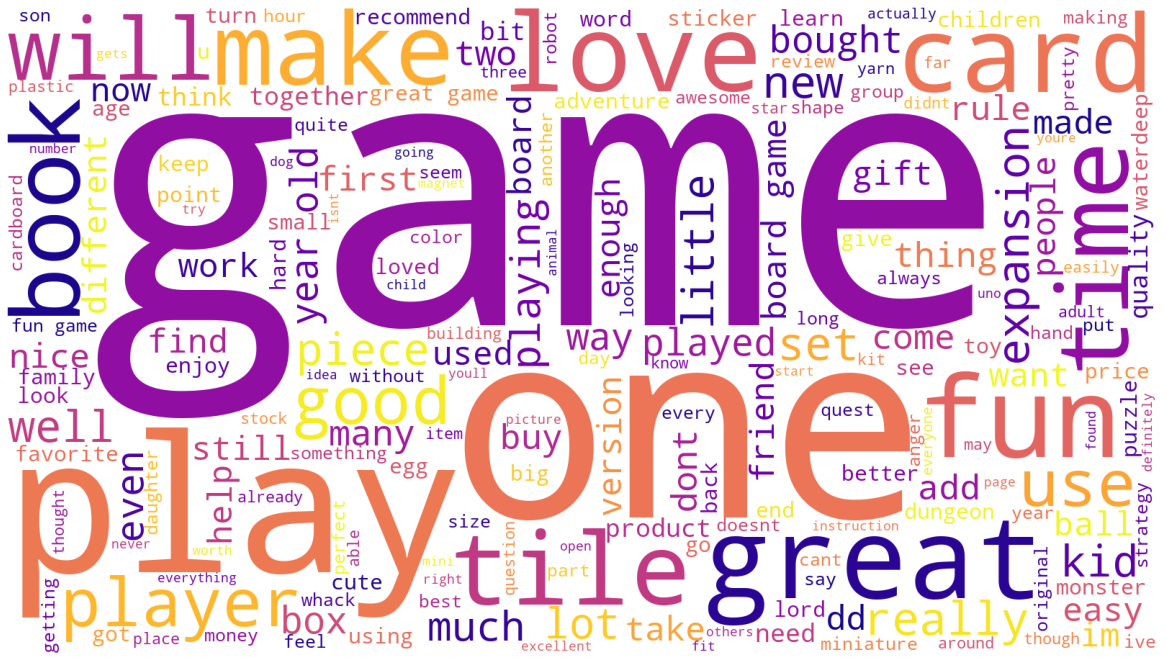

In [126]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [127]:
# Summary: Create a word cloud.
# Define an empty list of tokens.
all_summary_tokens = []

for i in range(summary1.shape[0]):
    all_summary_tokens = all_summary_tokens + summary1['tokens'][i]

# Define an empty string variable for WordCloud.
summary1_string = ''
for value in all_summary_tokens:
    summary1_string = summary1_string + value + ' '
    
wordcloud_sum = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary1_string)  

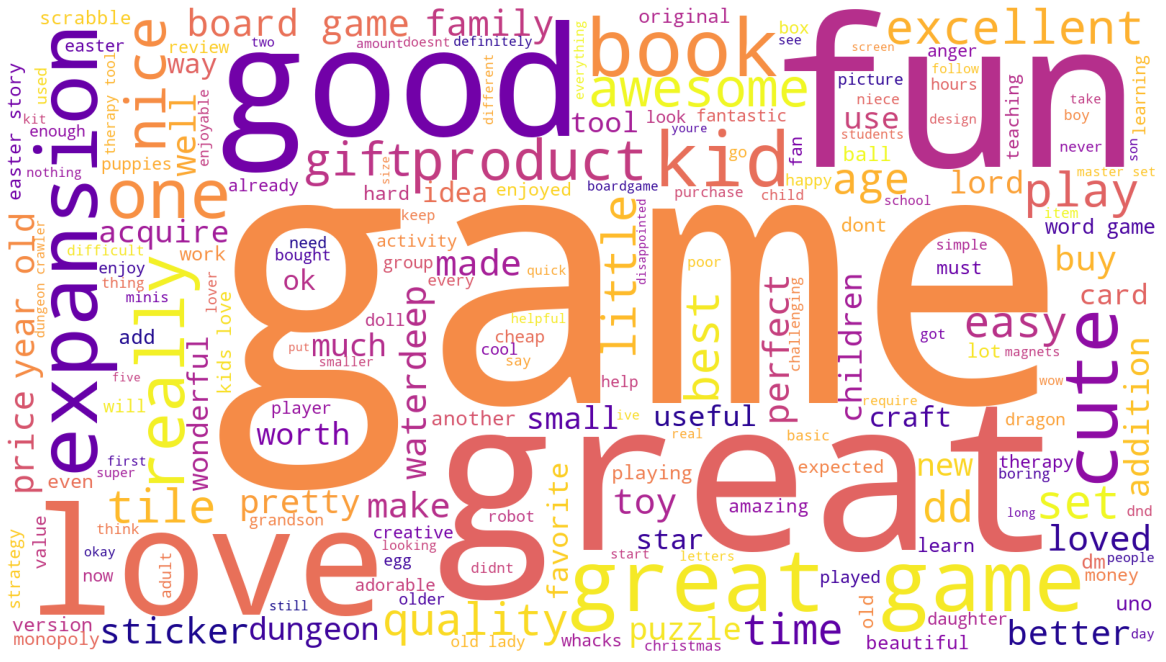

In [128]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16,9), facecolor= None)
plt.imshow(wordcloud_sum)
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [132]:
# Determine the frequency distribution (remember to use a list).
fdist_review = FreqDist(all_review_tokens)
fdist_review

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [131]:
# Determine the frequency distribution (remember to use a list).
fdist_sum = FreqDist(all_summary_tokens)
fdist_sum

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [138]:
# Delete all the alpanum.
tokens_review = [x for x in all_review_tokens if x.isalnum()]
tokens_sum = [x for x in all_summary_tokens if x.isalnum()]

In [140]:
# Remove all the stopwords

# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

tokens_review = [x for x in tokens_review if x.lower() not in english_stopwords]
tokens_sum = [x for x in tokens_sum if x.lower() not in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paipufei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [144]:
# Create a wordcloud without stop words - Review.
review2_string = ''
for value in tokens_review:
    # Add each filtered token word to the string.
    review2_string = review2_string + value + ' '

# Create a WordCloud.
wordcloud_review2 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(review2_string) 

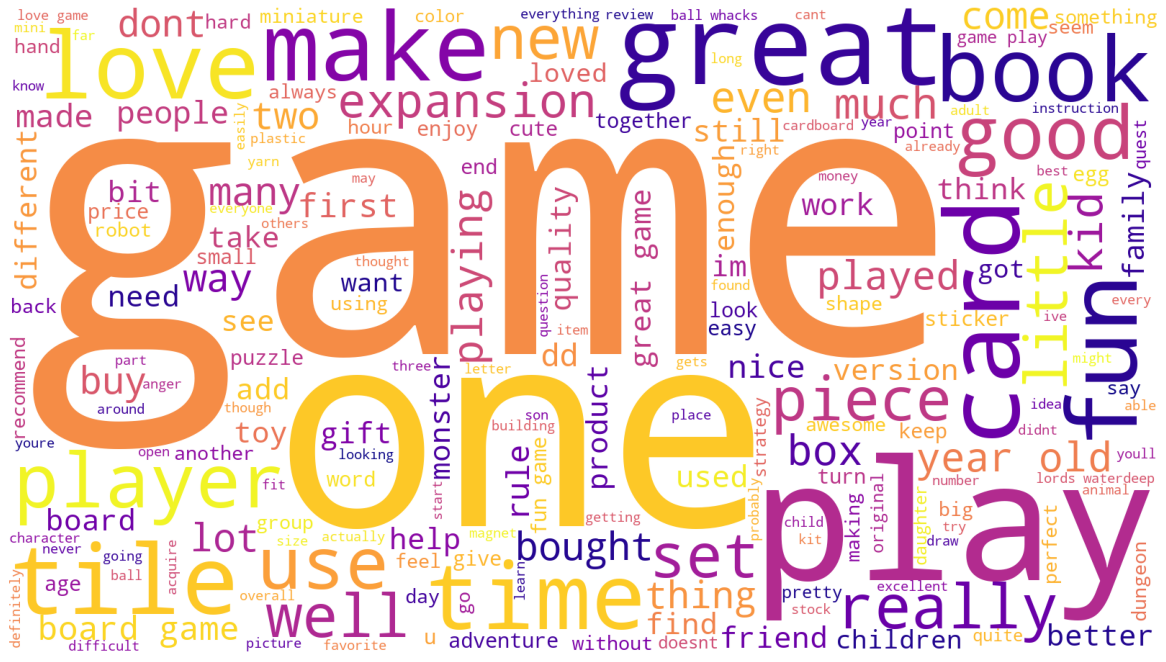

In [145]:
# Plot the WordCloud image - Review.                      
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [146]:
# Create a wordcloud without stop words - Summary.
summary2_string = ''
for value in tokens_review:
    # Add each filtered token word to the string.
    summary2_string = summary2_string + value + ' '

# Create a WordCloud.
wordcloud_summary2 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary2_string) 

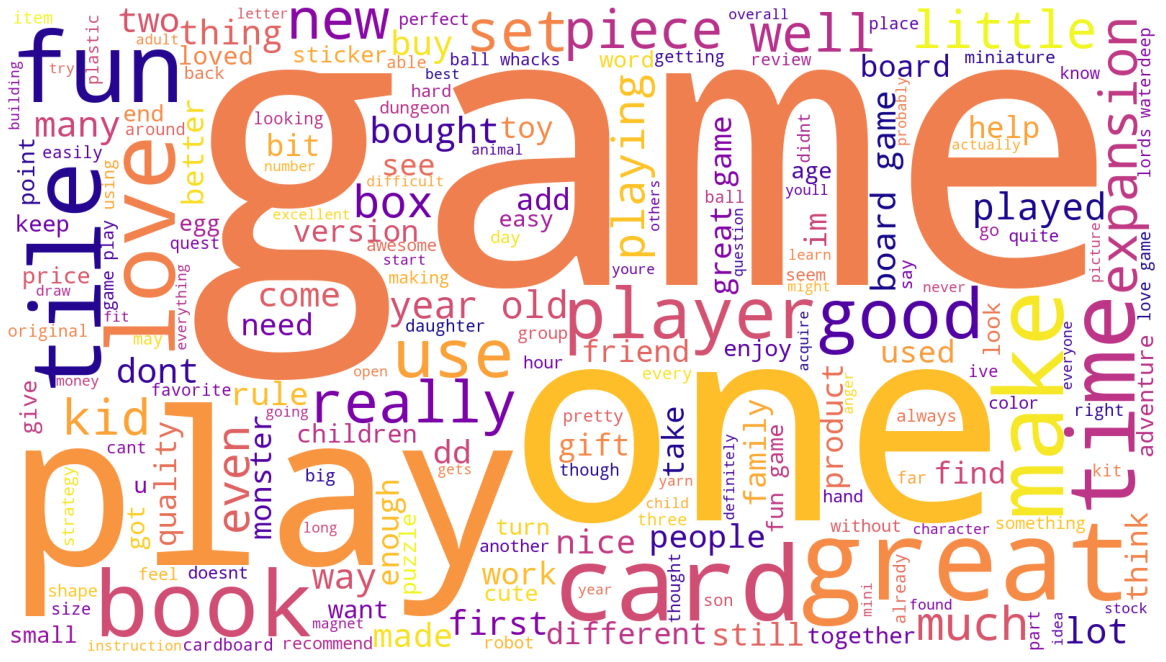

In [147]:
# Plot the WordCloud image - Summary.                      
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [154]:
# Determine the 15 most common words - Review.

# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(tokens_review).most_common(15), columns=['Word', 'Frequency']).set_index('Word')

counts_review

,Frequency
Word,
game,1668
great,579
fun,549
one,530
play,502
like,414
love,322
really,319
get,319


In [156]:
# Determine the 15 most common words - Summary.

# Generate a DataFrame from Counter.
counts_sum = pd.DataFrame(Counter(tokens_sum).most_common(15), columns=['Word', 'Frequency']).set_index('Word')

counts_review

,Frequency
Word,
game,1668
great,579
fun,549
one,530
play,502
like,414
love,322
really,319
get,319


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [158]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [160]:
# Determine polarity of both columns - Review.
review1['polarity'] = review1['review'].apply(generate_polarity)

# View output.
review1

,index,review,tokens,polarity
0,0,when it comes to a dms screen the space on the...,"[when, it, comes, to, a, dms, screen, the, spa...",-0.036111
1,1,an open letter to galeforce9 your unpainted mi...,"[an, open, letter, to, galeforce9, your, unpai...",0.035952
2,2,nice art nice printing why two panels are fill...,"[nice, art, nice, printing, why, two, panels, ...",0.116640
3,3,amazing buy bought it as a gift for our new dm...,"[amazing, buy, bought, it, as, a, gift, for, o...",0.578788
4,4,as my review of gf9s previous screens these we...,"[as, my, review, of, gf9s, previous, screens, ...",-0.316667
...,...,...,...,...
1945,1994,we are retired and find this a great way to st...,"[we, are, retired, and, find, this, a, great, ...",0.400000
1946,1995,the perfect word game for mixed ages with mom ...,"[the, perfect, word, game, for, mixed, ages, w...",0.168750
1947,1996,great game did not think i would like it when ...,"[great, game, did, not, think, i, would, like,...",0.158333
1948,1997,great game for all keeps the mind nimble,"[great, game, for, all, keeps, the, mind, nimble]",0.200000


In [163]:
# Determine polarity of both columns - Summary.
summary1['polarity'] = summary1['summary'].apply(generate_polarity)

# View output.
summary1

,index,summary,tokens,polarity
0,0,the fact that 50 of this space is wasted on ar...,"[the, fact, that, 50, of, this, space, is, was...",0.150000
1,1,another worthless dungeon masters screen from ...,"[another, worthless, dungeon, masters, screen,...",-0.800000
2,2,pretty but also pretty useless,"[pretty, but, also, pretty, useless]",0.000000
3,3,five stars,"[five, stars]",0.000000
4,4,money trap,"[money, trap]",0.000000
...,...,...,...,...
1346,1989,this is a fun card game for people who like words,"[this, is, a, fun, card, game, for, people, wh...",-0.050000
1347,1990,sort of a card game equivalent of scrabble and...,"[sort, of, a, card, game, equivalent, of, scra...",-0.400000
1348,1992,great game to keep the mind active,"[great, game, to, keep, the, mind, active]",0.088889
1349,1994,a great mind game,"[a, great, mind, game]",0.200000


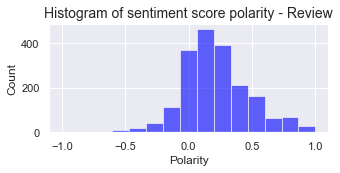

In [197]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot data.
plt.figure(figsize=(5,2))

plt.hist(review1['polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - Review', fontsize=14)

plt.show()

# Histogram of sentiment score

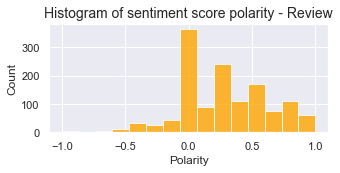

In [198]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot data.
plt.figure(figsize=(5,2))
plt.hist(summary1['polarity'], num_bins, facecolor='orange', alpha=0.8)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - Review', fontsize=14)

plt.show()

# Histogram of sentiment score

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [199]:
# Top 20 negative reviews.
positive_review_sentiment = review1.nlargest(20,'polarity')

# View output.
positive_review_sentiment

,index,review,tokens,polarity
7,7,came in perfect condition,"[came, in, perfect, condition]",1.0
164,165,awesome book,"[awesome, book]",1.0
193,194,awesome gift,"[awesome, gift]",1.0
489,496,excellent activity for teaching selfmanagement...,"[excellent, activity, for, teaching, selfmanag...",1.0
517,524,perfect just what i ordered,"[perfect, just, what, i, ordered]",1.0
583,591,wonderful product,"[wonderful, product]",1.0
601,609,delightful product,"[delightful, product]",1.0
613,621,wonderful for my grandson to learn the resurre...,"[wonderful, for, my, grandson, to, learn, the,...",1.0
782,790,perfect,[perfect],1.0
922,933,awesome,[awesome],1.0


In [200]:
# Top 20 negative summaries.
negative_review_sentiment = review1.nsmallest(20,'polarity')

# View output.
negative_review_sentiment

,index,review,tokens,polarity
207,208,booo unles you are patient know how to measure...,"[booo, unles, you, are, patient, know, how, to...",-1.000000
181,182,incomplete kit very disappointing,"[incomplete, kit, very, disappointing]",-0.780000
1766,1804,im sorry i just find this product to be boring...,"[im, sorry, i, just, find, this, product, to, ...",-0.583333
362,364,one of my staff will be using this game soon s...,"[one, of, my, staff, will, be, using, this, ga...",-0.550000
116,117,i bought this as a christmas gift for my grand...,"[i, bought, this, as, a, christmas, gift, for,...",-0.500000
226,227,this was a gift for my daughter i found it dif...,"[this, was, a, gift, for, my, daughter, i, fou...",-0.500000
229,230,i found the directions difficult,"[i, found, the, directions, difficult]",-0.500000
289,290,instructions are complicated to follow,"[instructions, are, complicated, to, follow]",-0.500000
300,301,difficult,[difficult],-0.500000
1496,1524,expensive for what you get,"[expensive, for, what, you, get]",-0.500000


In [202]:
# Top 20 positive reviews.
negative_sum_sentiment = summary1.nlargest(20,'polarity')

# View output.
negative_sum_sentiment

,index,summary,tokens,polarity
5,6,best gm screen ever,"[best, gm, screen, ever]",1.0
23,28,wonderful designs,"[wonderful, designs]",1.0
27,32,perfect,[perfect],1.0
61,80,theyre the perfect size to keep in the car or ...,"[theyre, the, perfect, size, to, keep, in, the...",1.0
107,134,perfect for preschooler,"[perfect, for, preschooler]",1.0
112,140,awesome sticker activity for the price,"[awesome, sticker, activity, for, the, price]",1.0
132,161,awesome book,"[awesome, book]",1.0
133,163,he was very happy with his gift,"[he, was, very, happy, with, his, gift]",1.0
150,187,awesome,[awesome],1.0
166,210,awesome and welldesigned for 9 year olds,"[awesome, and, welldesigned, for, 9, year, olds]",1.0


In [203]:
# Top 20 positive summaries.
positive_sum_sentiment = summary1.nsmallest(20, 'polarity')

# View output.
positive_sum_sentiment

,index,summary,tokens,polarity
17,21,the worst value ive ever seen,"[the, worst, value, ive, ever, seen]",-1.000000
165,208,boring unless you are a craft person which i am,"[boring, unless, you, are, a, craft, person, w...",-1.000000
588,829,boring,[boring],-1.000000
838,1166,before this i hated running any rpg campaign d...,"[before, this, i, hated, running, any, rpg, ca...",-0.900000
1,1,another worthless dungeon masters screen from ...,"[another, worthless, dungeon, masters, screen,...",-0.800000
116,144,disappointed,[disappointed],-0.750000
266,363,promotes anger instead of teaching calming met...,"[promotes, anger, instead, of, teaching, calmi...",-0.700000
635,885,too bad this is not what i was expecting,"[too, bad, this, is, not, what, i, was, expect...",-0.700000
638,890,bad qualityall made of paper,"[bad, qualityall, made, of, paper]",-0.700000
144,178,at age 31 i found these very difficult to make,"[at, age, 31, i, found, these, very, difficult...",-0.650000


## 7. Discuss: Insights and observations

***Your observations here...***

The re-processing was adapted before the sentiment analysis including dropping unnecessary columns, checking missing values, changing to lower cases, replacing punctuations, dropping duplicates, removing alphanumeric characters and stopwords and tokenising. The process helps to ensure accuracy and increase the efficiency of sentiment analysis afterwards. Based on the display of the word cloud and the frequency distribution, 15 most common words in both review and summary columns are demonstrated. The text such as “game, great, fun, like, play, good” clearly explains that the customers tend to have positive sentiments towards the game. Interestingly, the review of polarity and sentiment shows that most of the text in the review and summary tend to be natural as most of the text has a sentiment score close to 0. Through reviewing the top 20 positive and negative reviews for both columns, the details of the text provide a deep understanding of customer sentiments. For instance, some customers buy a particular board game as a gift. In this case, the marketing can promote the game during Christmas to increase sales. The negative sentiments can help to spot the pinpoints and the team should implement an improvement plan for the product or service. For instance, text such as “boring and disappointing” and “bad quality” explain that the product doesn’t meet customer needs. The team should take action towards the improvement shortly before losing more customers.



# 